## AI Project UCS415 
#### Finding Popularity of Spotify Songs 
Nitansh Jain  102017025

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
# import sklearn

In [26]:
spotify_df = pd.read_csv('top10s.csv', encoding='latin-1')
spotify_df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [27]:
# checking if any null values are present
print(spotify_df.isnull().sum())

Unnamed: 0    0
title         0
artist        0
top genre     0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64


In [28]:
spotify_df.dtypes

Unnamed: 0     int64
title         object
artist        object
top genre     object
year           int64
bpm            int64
nrgy           int64
dnce           int64
dB             int64
live           int64
val            int64
dur            int64
acous          int64
spch           int64
pop            int64
dtype: object

In [29]:
# converting name of column top genre to genre
spotify_df = spotify_df.rename(columns={'top genre': 'genre', 'pop': 'popularity'})
spotify_df.head()

,Unnamed: 0,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [30]:
spotify_df.drop_duplicates(subset=['title','artist'],inplace=True)
spotify_df.drop(spotify_df.loc[spotify_df['title']=='Million Years Ago'].index, inplace=True)
print(spotify_df.shape)

(586, 15)


In [31]:
# getting columns from spotify_df from bpm to artist_type via loc
spotify_features = spotify_df

# dropping column added and top year from dataframe
spotify_features.drop(['title', 'Unnamed: 0'], axis=1, inplace=True)
spotify_df.head()

,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
0,Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [32]:
from sklearn import preprocessing
le_artist = preprocessing.LabelEncoder()
le_artist.fit(spotify_features['artist'])
spotify_features['artist'] = le_artist.transform(spotify_features['artist'])

le_genre = preprocessing.LabelEncoder()
le_genre.fit(spotify_features['genre'])
spotify_features['genre'] = le_genre.transform(spotify_features['genre'])


In [33]:
# splitting dataframe into dependent and independent variables
spotify_features_x = spotify_features.drop(['popularity'], axis=1)
spotify_features_y = spotify_features['popularity']

In [34]:
# print(spotify_features_x.head())
spotify_features_x_np = np.asarray(spotify_features_x)
spotify_features_x_np[0:5]

# print(spotify_features_y.head())
spotify_features_y_np = np.asarray(spotify_features_y)
spotify_features_y_np[0:5]

array([83, 82, 80, 79, 78])

In [35]:
from sklearn import preprocessing
spotify_features_X = preprocessing.MinMaxScaler().fit_transform(spotify_features_x_np)
spotify_features_Y = preprocessing.MinMaxScaler().fit_transform(spotify_features_y_np.reshape(-1, 1))


In [36]:
# splitting the data into training and testing sets
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(spotify_features_X, spotify_features_Y, test_size=0.25, random_state=42)

Using MultiLinear Regression

In [37]:
# importing Linear Regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [38]:
# fitting the model to the training data
lr.fit(x_train, y_train)
print(lr.intercept_)
print(lr.coef_)

[0.55051865]
[[ 0.01138465  0.05845734  0.13415788 -0.01627189 -0.14011614  0.00901035
   0.14211916 -0.02808106  0.03601412  0.01919874 -0.02436249 -0.01531792]]


In [39]:
# predicting the test data
yhat_spotify_popularity_lr = lr.predict(x_test)


In [40]:
# finding the mean squared error, root mean squared error, and R2 score
from sklearn.metrics import r2_score,accuracy_score

print('Mean Square Error: %.2f' % np.mean((y_test - yhat_spotify_popularity_lr) ** 2))
print('Root Mean Square Error: %.2f' % np.sqrt(np.mean((y_test - yhat_spotify_popularity_lr) ** 2)))
print('Mean Absolute Error: %.2f' % np.mean(np.abs(y_test - yhat_spotify_popularity_lr)))
print('R2 score: %.2f' % r2_score(y_test, yhat_spotify_popularity_lr))


Mean Square Error: 0.02
Root Mean Square Error: 0.14
Mean Absolute Error: 0.10
R2 score: 0.03


<AxesSubplot:>

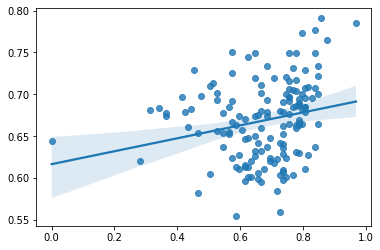

In [41]:
sns.regplot(x=y_test, y=yhat_spotify_popularity_lr, data=spotify_features)
# print(y_test.shape)
# print(yhat_spotify_popularity_lr.shape)

In [42]:
print(yhat_spotify_popularity_lr[0:5])
print(y_test[0:5])

[[0.70459606]
 [0.69151605]
 [0.77304572]
 [0.66334642]
 [0.68898325]]
[[0.76767677]
 [0.75757576]
 [0.7979798 ]
 [0.58585859]
 [0.78787879]]


Using Polynomial Regression

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly = PolynomialFeatures(degree=2) # degree of the polynomial features 
train_spotify_pop_poly = poly.fit_transform(x_train) # transforming the training data

In [45]:
clf = linear_model.LinearRegression() # create a linear regression object
clf.fit(train_spotify_pop_poly, y_train) # fitting the model to the training data
# print(clf.intercept_) # printing the intercept
# print(clf.coef_) # printing the coefficients

LinearRegression()

In [46]:
x_test_poly = poly.fit_transform(x_test) # transform the test data into polynomial features for the model
yhat_test_spotify_pop_poly_lr = clf.predict(x_test_poly) # predict the test data using the model

In [47]:
# finding mean square error, root mean square error, and R2 score

print('Mean Square Error: %.2f' % np.mean((y_test - yhat_test_spotify_pop_poly_lr) ** 2))
print('Root Mean Square Error: %.2f' % np.sqrt(np.mean((y_test - yhat_test_spotify_pop_poly_lr) ** 2)))
print('Mean Absolute Error: %.2f' % np.mean(np.abs(y_test - yhat_spotify_popularity_lr)))
print('R2 score: %.2f' % r2_score(y_test, yhat_test_spotify_pop_poly_lr))

Mean Square Error: 0.02
Root Mean Square Error: 0.15
Mean Absolute Error: 0.10
R2 score: -0.25


<AxesSubplot:>

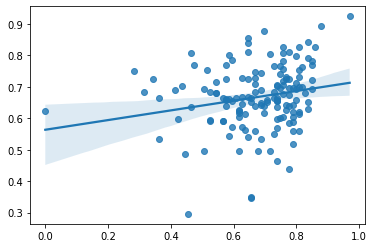

In [48]:
sns.regplot(x=y_test, y=yhat_test_spotify_pop_poly_lr, data=spotify_features)
